In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Análise Fatorial por Componentes Principais

Exemplo da aula do MBA DSA USP/ESALQ com Prof. Wilson Tarantin Jr.

Fonte: Fávero e Belfiore, MANUAL DE ANÁLISE DE DADOS, Capítulo 10

- Referência: https://www.datacamp.com/tutorial/introduction-factor-analysis

- Documentação: https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html


### Aplicabilidade

Objetivo de agrupar as variáveis do dataset. <br>

É aplicada quando as variáveis forem métrica, pois depende da matriz de correlação de pearson.


### Objetivo da Análise

Resumir as informações dos imóveis para que possam ser ofertados de maneira mais simples aos clientes.<br>
Quais dos 4.954 imóveis deveria priorizar na oferta?

In [2]:
casas = pd.read_excel(r'bases\preco_casas.xlsx')

In [3]:
casas.describe()

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,distance_to_school,house_age,distance_to_supermarket_km,crime_rate_index,property_value
count,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000
mean,250.131409,231.250908,3.788252,3.199839,3.454219,11.444691,3.508639,2.986110,201974.738999
std,103.131939,94.571642,1.585371,1.602300,2.007358,6.356991,1.991266,1.737742,90031.882219
min,100.000000,85.000000,1.000000,1.000000,0.100000,1.000000,0.100000,0.010000,32622.000000
25%,180.000000,165.000000,3.000000,2.000000,1.700000,6.000000,1.800000,1.470000,136777.000000
50%,235.000000,217.500000,4.000000,3.000000,3.400000,11.000000,3.500000,3.020000,194515.500000
75%,295.000000,274.000000,5.000000,4.000000,5.200000,17.000000,5.300000,4.490000,246590.000000
max,796.000000,760.000000,8.000000,9.000000,6.900000,22.000000,6.900000,5.990000,692086.000000


## Aplicando Coeficiente de Correlação de Pearson

### Matriz de Correlação


In [4]:
variaveis = casas.iloc[:,:8]
matriz_corr = variaveis.corr()
matriz_corr

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,distance_to_school,house_age,distance_to_supermarket_km,crime_rate_index
land_size_sqm,1.000000,0.991371,0.898252,0.679780,-0.011094,0.006547,0.004692,0.007752
house_size_sqm,0.991371,1.000000,0.894753,0.677722,-0.010658,0.008198,0.001966,0.008044
no_of_rooms,0.898252,0.894753,1.000000,0.710043,-0.006162,0.003455,-0.007287,0.014644
no_of_bathrooms,0.679780,0.677722,0.710043,1.000000,-0.008322,0.000966,-0.002535,0.010655
distance_to_school,-0.011094,-0.010658,-0.006162,-0.008322,1.000000,0.011519,0.010095,-0.002084
house_age,0.006547,0.008198,0.003455,0.000966,0.011519,1.000000,-0.002793,-0.000667
distance_to_supermarket_km,0.004692,0.001966,-0.007287,-0.002535,0.010095,-0.002793,1.000000,0.018026
crime_rate_index,0.007752,0.008044,0.014644,0.010655,-0.002084,-0.000667,0.018026,1.000000


### Matriz de Significância

Matriz com p-valores do coeficiente de correlação. <br> Avaliar a significância individual de cada coeficiente de correlação dos pares de variáveis.

**p-valor < 0,05 indica que o coeficiente de correlação é estatisticamente relevante**

Os coeficientes entre land_size_sqm-house_size_sqm por exemplo são estatisticamente relevantes.

Diferentemente dos coeficientes de correlação de land_size_sqm-distance_to_school que são estatisticamente iguais a 0, ou seja, não há correlação entre eles.

In [5]:
# Importa modulo criado para gerar matriz de significância
from matrixSig import matrixSig

#matrixSig(matriz de correlacao, dataFrame)

matriz_sig = matrixSig(matriz_corr, variaveis)
matriz_sig

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,distance_to_school,house_age,distance_to_supermarket_km,crime_rate_index
land_size_sqm,NA,0.0,0.0,0.0,0.43501,0.64502,0.7413,0.5854
house_size_sqm,0.0,NA,0.0,0.0,0.45327,0.56404,0.88998,0.57138
no_of_rooms,0.0,0.0,NA,0.0,0.66459,0.8079,0.60812,0.30278
no_of_bathrooms,0.0,0.0,0.0,NA,0.55814,0.94578,0.85845,0.4534
distance_to_school,0.43501,0.45327,0.66459,0.55814,NA,0.4176,0.47746,0.88341
house_age,0.64502,0.56404,0.8079,0.94578,0.4176,NA,0.84417,0.96254
distance_to_supermarket_km,0.7413,0.88998,0.60812,0.85845,0.47746,0.84417,NA,0.20461
crime_rate_index,0.5854,0.57138,0.30278,0.4534,0.88341,0.96254,0.20461,NA


### Mapa de Calor das Correlações

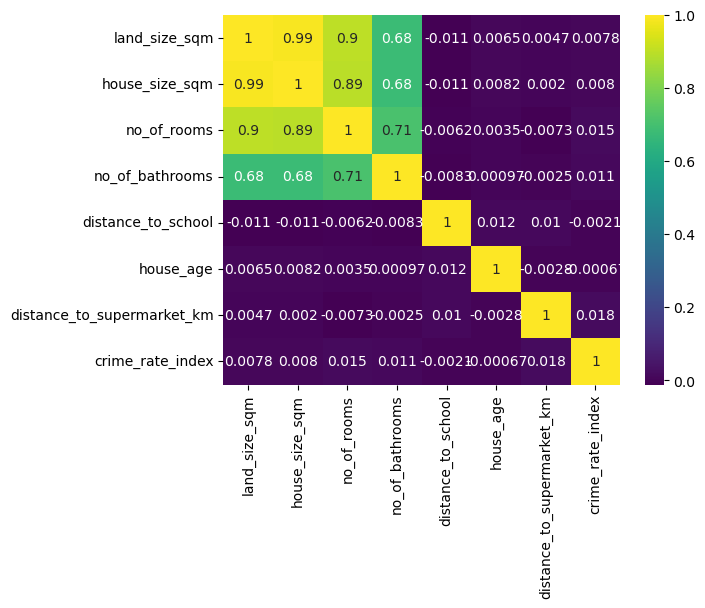

In [6]:
#Gráfico matriz correlação

sns.heatmap(matriz_corr, cmap='viridis', annot=True)
plt.show()

## Elaboração da Análise Fatorial por Componentes Principais

### Teste de Esfericidade de Barlett

Avalia se a aplicação da análise fatorial é adequada ou não.<br>
O teste verifica se os coeficientes de correlação são estatisticamente diferentes de zero.

p-valor < 0,05: rejeita H0

>H0: A Matriz de Correlação é igual à Matriz Identidade.

>H1: A Matriz de Correlação não é igual à Matriz Identidade.

onde,

Matriz Indentidade:
<img src='img\matriz_id.png' style="width: 200px;">


Não queremos que as correlações sejam iguais a zero, pois assim não existiria nenhuma correlação entre as variáveis e consequentemente não seria possível criar fatores.

In [20]:
#https://www.datacamp.com/tutorial/introduction-factor-analysis
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity


# Calcula p-valor para avaliar se rejeita H0
chi_square_value, p_value=calculate_bartlett_sphericity(variaveis)
print()

print(f'ChiSq: {chi_square_value:.4f}, p-value: {p_value:.4f}')


ChiSq: 31857.4557, p-value: 0.0000


### Elaboração da Análise Fatorial por Componentes Principais

In [21]:
#https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html#module-factor_analyzer.factor_analyzer
from factor_analyzer import FactorAnalyzer

# Aplicando o metodo fatorial utilziando todas as variáveis da base
fa = FactorAnalyzer(rotation=None, n_factors=len(variaveis.columns), method='principal')
fa.fit(variaveis)

FactorAnalyzer(method='principal', n_factors=8, rotation=None,
               rotation_kwargs={})

### Eigenvalues ( Autovalores)

O primeiro Autovalor é sempre o maior valor e que gera o fator principal.


Os Autovalores apresentam a proporção da variância que foi compartilhada pelas variáveis originais na formação daquele fator.

43% da variância das variáveis originais já estão representadas no primeiro fator. <br>
12,7% da variância das variáveis originais estão representadas no segundo fator. <br>
12,6% da variância das variáveis originais estão representadas no terceiro fator. <br>
As 3 representam 68,4% da variância das variáveis originais.

In [22]:
# Obtem os Eigenvalues (autovalores)
ev, v = fa.get_eigenvalues()

# Cria tabela de autovalores com respectivas variâncias e variâncias acumuladas
tabela_eigen = pd.DataFrame(fa.get_factor_variance()).round(3)
tabela_eigen.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen

,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6,Fator 7,Fator 8
Autovalor,3.441,1.020,1.012,0.992,0.977,0.422,0.128,0.009
Variância,0.430,0.127,0.126,0.124,0.122,0.053,0.016,0.001
Variância Acumulada,0.430,0.558,0.684,0.808,0.930,0.983,0.999,1.000


# Critério de Kaiser

Seleciona os fatores derivados de autovalores maiores que 1, ou seja, fatores que têm percentual maior de variância das variáveis originais.

Esse critério tem como base o raciocínio de que autovalores representam a quantidade de variação explicada por um fator e que um autovalor de 1 representa uma quantidade substancial de variação. (https://repositorio.enap.gov.br/bitstream/1/4790/1/Livro%20An%C3%A1lise%20Fatorial.pdf)

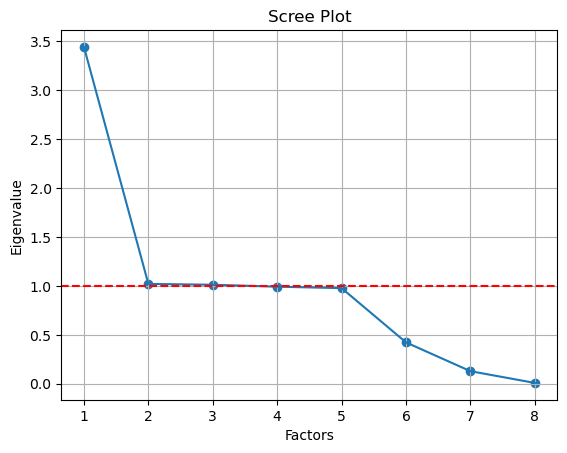

In [24]:
#https://www.kaggle.com/code/caesarlupum/factor-analysis-segmentation-analysis/notebook
plt.scatter(range(1,variaveis.shape[1]+1),ev)
plt.plot(range(1,variaveis.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid()
plt.show()

In [64]:
# Definindo a quantidade de Fatores > 1
k = len(list(filter(lambda x: x>1, tabela_eigen.T['Autovalor'])))
k

3

### Aplicando o Método Utilizando 3 Fatores

In [67]:
# Setando parâmetros
fa2 = FactorAnalyzer(n_factors=k, method='principal', rotation=None)
fa2.fit(variaveis)

FactorAnalyzer(method='principal', rotation=None, rotation_kwargs={})

In [82]:
# Gerando os Fatores
fatores_preditos = pd.DataFrame(fa2.transform(variaveis))
fatores_preditos.columns = [f"Fator {i+1}" for i in range(k)]
fatores_preditos

,Fator 1,Fator 2,Fator 3
0,-0.763931,0.409791,-0.005071
1,-0.286895,-0.720208,-0.507750
2,-0.132644,0.413418,1.559236
3,-0.734837,-0.181887,-0.025554
4,-0.850848,-1.858475,0.369112
...,...,...,...
4949,0.378174,0.565149,0.528827
4950,0.149131,0.216979,0.269514
4951,-0.533601,0.683343,-0.789444
4952,-1.044735,-0.113250,-1.662989


### Cargas Fatoriais

São as correlações de pearson entre o fator e a variável original.<br>
Temos a mesma conclusão dos scores fatoriais (pesos).

Fator 1 está representando as land_size_sqm, house_size_sqm, no_of_rooms, no_of_bathrooms. <br>
Fator 2 está representando distance_to_supermarket_km e crime_rate_index. <br>
Fator 3 está representando distance_to_school e house_age

In [77]:
# Cargas Fatoriais

cargas_fatoriais = pd.DataFrame(fa2.loadings_)
cargas_fatoriais.rename(columns = lambda x: 'Fator ' + str(x + 1), inplace=True)
cargas_fatoriais.index = variaveis.columns
cargas_fatoriais.round(3)

,Fator 1,Fator 2,Fator 3
land_size_sqm,0.969,0.001,0.003
house_size_sqm,0.968,-0.001,0.005
no_of_rooms,0.949,-0.003,0.003
no_of_bathrooms,0.815,-0.002,-0.003
distance_to_school,-0.014,0.350,0.642
house_age,0.007,0.080,0.693
distance_to_supermarket_km,-0.001,0.720,-0.113
crime_rate_index,0.016,0.610,-0.326


## Comunalidades

São o percentual das variâncias por variável que restaram após a aplicação do critério da raiz latente.

Tivemos poucas perdas:

- land_size_sqm
- house_size_sqm
- no_of_rooms

Média Perdas:

- no_of_bathrooms
- distance_to_supermarket_km

Pouco mais de Perdas:

- house_age
- crime_rate_index

In [76]:
# Calculando comunalidades
communalities = fa2.get_communalities()
communalities = pd.DataFrame(communalities, index=variaveis.T.index, columns=['communalities'])
communalities.sort_values(by=['communalities'], ascending=False).head(8)

,communalities
land_size_sqm,0.939590
house_size_sqm,0.936791
no_of_rooms,0.900057
no_of_bathrooms,0.663930
distance_to_school,0.535414
distance_to_supermarket_km,0.531702
house_age,0.486218
crime_rate_index,0.478541


## Gráficos das Cargas

Fator 1 x Fator 2

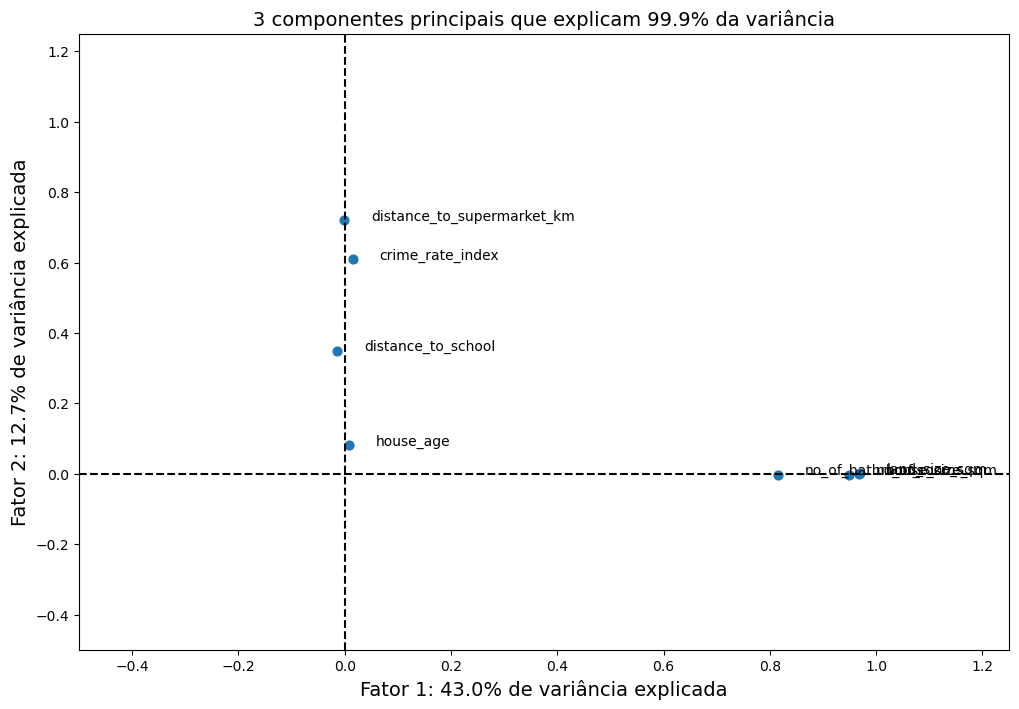

In [78]:
# Gráfico das cargas fatoriais e suas variâncias nos componentes principais
plt.figure(figsize=(12,8))

tabela_cargas_chart = cargas_fatoriais.reset_index()

plt.scatter(tabela_cargas_chart['Fator 1'], tabela_cargas_chart['Fator 2'], s=40)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.05, point['y'], point['val'])

label_point(x = tabela_cargas_chart['Fator 1'],
            y = tabela_cargas_chart['Fator 2'],
            val = tabela_cargas_chart['index'],
            ax = plt.gca()) 

plt.axhline(y=0, color='black', ls='--')
plt.axvline(x=0, color='black', ls='--')
plt.ylim([-0.5,1.25])
plt.xlim([-0.5,1.25])
plt.title(f"{tabela_eigen.shape[0]} componentes principais que explicam {round(tabela_eigen.T['Variância'].sum()*100,2)}% da variância", fontsize=14)
plt.xlabel(f"Fator 1: {round(tabela_eigen.T.iloc[0]['Variância']*100,2)}% de variância explicada", fontsize=14)
plt.ylabel(f"Fator 2: {round(tabela_eigen.T.iloc[1]['Variância']*100,2)}% de variância explicada", fontsize=14)
plt.show()


Fator 1 x Fator 3

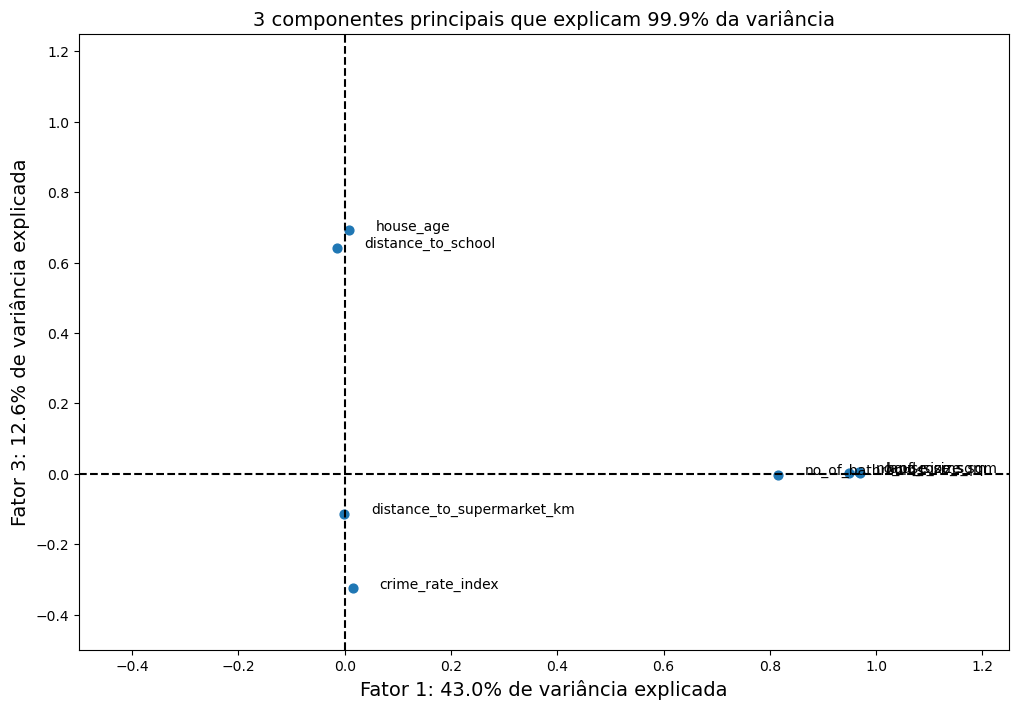

In [117]:
# Gráfico das cargas fatoriais e suas variâncias nos componentes principais
plt.figure(figsize=(12,8))

tabela_cargas_chart = cargas_fatoriais.reset_index()

plt.scatter(tabela_cargas_chart['Fator 1'], tabela_cargas_chart['Fator 3'], s=40)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.05, point['y'], point['val'])

label_point(x = tabela_cargas_chart['Fator 1'],
            y = tabela_cargas_chart['Fator 3'],
            val = tabela_cargas_chart['index'],
            ax = plt.gca()) 

plt.axhline(y=0, color='black', ls='--')
plt.axvline(x=0, color='black', ls='--')
plt.ylim([-0.5,1.25])
plt.xlim([-0.5,1.25])
plt.title(f"{tabela_eigen.shape[0]} componentes principais que explicam {round(tabela_eigen.T['Variância'].sum()*100,2)}% da variância", fontsize=14)
plt.xlabel(f"Fator 1: {round(tabela_eigen.T.iloc[0]['Variância']*100,2)}% de variância explicada", fontsize=14)
plt.ylabel(f"Fator 3: {round(tabela_eigen.T.iloc[2]['Variância']*100,2)}% de variância explicada", fontsize=14)
plt.show()

## Criando Ranking com Fatores

Ranking baseado no Fator 1 e Fator 2 ponderando pela variância compartilhada entre os dois fatores.

ou seja,

(Fator 1 * 0,43) + (Fator 2 * 0,127) + (Fator 3 * 0,126)

In [112]:
# Criando um ranking
casas['Ranking'] = 0

for index, fator in enumerate(list(cargas_fatoriais.T.index)):
    variancia = tabela_eigen.T.loc[fator]['Variância']

    casas['Ranking'] = casas['Ranking'] + fatores_preditos[fatores_preditos.T.index[index]]*variancia

    
casas = casas.sort_values(by=['Ranking'], ascending=False)
casas.head(10)

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,distance_to_school,house_age,distance_to_supermarket_km,crime_rate_index,property_value,Ranking
1272,773,760,8,9,3.5,16,6.5,4.08,576789,2.186733
2165,727,642,8,9,6.7,15,4.1,5.64,549116,2.102459
1700,788,737,8,7,4.2,12,6.8,3.70,609407,2.033132
3245,767,678,8,9,5.8,12,4.6,0.06,692086,1.994501
2080,749,634,8,6,6.6,21,1.9,3.98,548638,1.895396
2640,622,584,8,9,5.3,16,5.4,5.31,471351,1.876534
121,707,706,8,8,4.6,8,4.2,5.98,633937,1.874459
2730,781,727,8,9,4.2,5,4.1,1.13,631783,1.873785
4916,752,689,8,6,6.1,21,1.6,1.43,565913,1.873116
2733,796,692,8,9,0.3,16,5.3,3.40,609388,1.872124


## O Ranking Captura o Valor das Casas?

Sim, existe uma alta correlação entre o ranking e os valores das casas com significância estatística.

In [114]:
# Calculando a correlação do valor das casas com o ranking
valor_corr_coef = casas.iloc[:,8:].corr()
valor_corr_coef

,property_value,Ranking
property_value,1.000000,0.849917
Ranking,0.849917,1.000000


In [115]:
# Calculando a significância dos coeficientes de correlação
matrixSig(valor_corr_coef, casas.iloc[:,8:])

,property_value,Ranking
property_value,NA,0.0
Ranking,0.0,NA
